In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

from transformers import AutoTokenizer

checkpoint = "bert-base-chinese"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer

PreTrainedTokenizerFast(name_or_path='bert-base-chinese', vocab_size=21128, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

![](https://chushi123.oss-cn-beijing.aliyuncs.com/img/202202262158097.png)

**Tokenizer：将文本转换为模型可以处理的数据。模型只能处理数字，因此Tokenizer需要将我们的文本输入转换为数字数据。**
1. 第一步是将文本拆分为单词（或单词的一部分、标点符号等），通常称为标记。有多个规则可以管理该过程，这就是为什么我们需要使用模型名称来实例化分词器，以确保我们使用模型预训练时使用的相同规则。
2. 第二步是将这些标记转换为数字，这样我们就可以用它们构建一个张量并将它们提供给模型。为此，分词器有一个词汇表，这是我们在使用from_pretrained方法实例化它时下载的部分。同样，**我们需要使用模型预训练时使用的相同词汇**。

![](https://chushi123.oss-cn-beijing.aliyuncs.com/img/202202262159317.png)

tokenizer方法实现了tokenization，处理special tokens和转化为input ids三个过程。

# 编码一个句子

In [2]:
sents = "选择珠江花园的原因就是方便。"
inputs = tokenizer(sents)
inputs

{'input_ids': [101, 6848, 2885, 4403, 3736, 5709, 1736, 4638, 1333, 1728, 2218, 3221, 3175, 912, 511, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

1. input_ids：句子中每个标记的唯一标识符。
2. token_type_ids：告诉模型输出的哪一部分是第一句，哪一部分是第二句。
3. attention_mask：具有与input_ids张量完全相同形状的张量，填充0和1：1表示应注意的相应位置的标记，0表示不应注意的相应位置的标记(即，模型的 attention layers 应忽略它们)。

## 将索引ID转换回标记

In [3]:
tokenizer.decode(inputs["input_ids"])

'[CLS] 选 择 珠 江 花 园 的 原 因 就 是 方 便 。 [SEP]'

请注意，该decode方法不仅将索引转换回标记，还将属于相同单词的标记组合在一起以生成可读的句子。当我们使用预测新文本的模型（从提示生成的文本，或序列到序列问题（如翻译或摘要））时，这种行为将非常有用。

# 编码一批单个句子

In [4]:
sents = [
    "选择珠江花园的原因就是方便。",
    "笔记本的键盘确实爽。",
    "房间太小。其他的都一般。",
    "今天才知道这书还有第6卷,真有点郁闷.",
    "机器背面似乎被撕了张什么标签，残胶还在。",
]
inputs = tokenizer(sents)
inputs
tokenizer.decode(inputs["input_ids"][0])
tokenizer.decode(inputs["input_ids"][1])
tokenizer.decode(inputs["input_ids"][-1])

{'input_ids': [[101, 6848, 2885, 4403, 3736, 5709, 1736, 4638, 1333, 1728, 2218, 3221, 3175, 912, 511, 102], [101, 5011, 6381, 3315, 4638, 7241, 4669, 4802, 2141, 4272, 511, 102], [101, 2791, 7313, 1922, 2207, 511, 1071, 800, 4638, 6963, 671, 5663, 511, 102], [101, 791, 1921, 2798, 4761, 6887, 6821, 741, 6820, 3300, 5018, 127, 1318, 117, 4696, 3300, 4157, 6944, 7315, 119, 102], [101, 3322, 1690, 5520, 7481, 849, 725, 6158, 3056, 749, 2476, 784, 720, 3403, 5041, 8024, 3655, 5540, 6820, 1762, 511, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

'[CLS] 选 择 珠 江 花 园 的 原 因 就 是 方 便 。 [SEP]'

'[CLS] 笔 记 本 的 键 盘 确 实 爽 。 [SEP]'

'[CLS] 机 器 背 面 似 乎 被 撕 了 张 什 么 标 签 ， 残 胶 还 在 。 [SEP]'

# 编码一对句子

In [5]:
sents = [["选择珠江花园的原因就是方便。", "笔记本的键盘确实爽。"]]
inputs = tokenizer(sents)
inputs
tokenizer.decode(inputs["input_ids"][0])

{'input_ids': [[101, 6848, 2885, 4403, 3736, 5709, 1736, 4638, 1333, 1728, 2218, 3221, 3175, 912, 511, 102, 5011, 6381, 3315, 4638, 7241, 4669, 4802, 2141, 4272, 511, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

'[CLS] 选 择 珠 江 花 园 的 原 因 就 是 方 便 。 [SEP] 笔 记 本 的 键 盘 确 实 爽 。 [SEP]'

# 编码多对句子

## 编码多对句子，输入方式1

In [6]:
sents = [["选择珠江花园的原因就是方便。", "笔记本的键盘确实爽。"], ["房间太小。其他的都一般。", "今天才知道这书还有第6卷,真有点郁闷."]]
inputs = tokenizer(sents, padding=True)
inputs
tokenizer.decode(inputs["input_ids"][0])
tokenizer.decode(inputs["input_ids"][-1])

{'input_ids': [[101, 6848, 2885, 4403, 3736, 5709, 1736, 4638, 1333, 1728, 2218, 3221, 3175, 912, 511, 102, 5011, 6381, 3315, 4638, 7241, 4669, 4802, 2141, 4272, 511, 102, 0, 0, 0, 0, 0, 0, 0], [101, 2791, 7313, 1922, 2207, 511, 1071, 800, 4638, 6963, 671, 5663, 511, 102, 791, 1921, 2798, 4761, 6887, 6821, 741, 6820, 3300, 5018, 127, 1318, 117, 4696, 3300, 4157, 6944, 7315, 119, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

'[CLS] 选 择 珠 江 花 园 的 原 因 就 是 方 便 。 [SEP] 笔 记 本 的 键 盘 确 实 爽 。 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

'[CLS] 房 间 太 小 。 其 他 的 都 一 般 。 [SEP] 今 天 才 知 道 这 书 还 有 第 6 卷, 真 有 点 郁 闷. [SEP]'

## 编码多对句子，输入方式2
**注意和上一种方式的句子对应关系区别**

In [7]:
inputs = tokenizer(
    ["选择珠江花园的原因就是方便。", "笔记本的键盘确实爽。", "我爱你中国"],
    ["房间太小。其他的都一般。", "今天才知道这书还有第6卷,真有点郁闷.", "我亲爱的祖国"],
    padding=True,
)
inputs
tokenizer.decode(inputs["input_ids"][0])
tokenizer.decode(inputs["input_ids"][-1])

{'input_ids': [[101, 6848, 2885, 4403, 3736, 5709, 1736, 4638, 1333, 1728, 2218, 3221, 3175, 912, 511, 102, 2791, 7313, 1922, 2207, 511, 1071, 800, 4638, 6963, 671, 5663, 511, 102, 0, 0, 0], [101, 5011, 6381, 3315, 4638, 7241, 4669, 4802, 2141, 4272, 511, 102, 791, 1921, 2798, 4761, 6887, 6821, 741, 6820, 3300, 5018, 127, 1318, 117, 4696, 3300, 4157, 6944, 7315, 119, 102], [101, 2769, 4263, 872, 704, 1744, 102, 2769, 779, 4263, 4638, 4862, 1744, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

'[CLS] 选 择 珠 江 花 园 的 原 因 就 是 方 便 。 [SEP] 房 间 太 小 。 其 他 的 都 一 般 。 [SEP] [PAD] [PAD] [PAD]'

'[CLS] 我 爱 你 中 国 [SEP] 我 亲 爱 的 祖 国 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

# 获取字典

In [8]:
zidian = tokenizer.get_vocab()

type(zidian)
len(zidian)
"月光" in zidian

dict

21128

False

# 添加新词、新符号

In [9]:
# 添加新词
tokenizer.add_tokens(new_tokens=["月光", "希望"])

# 添加新符号
tokenizer.add_special_tokens({"eos_token": "[EOS]"})

zidian = tokenizer.get_vocab()

type(zidian), len(zidian), zidian["月光"], zidian["[EOS]"]

2

1

(dict, 21131, 21128, 21130)

## 编码新添加的词

In [10]:
sents = "月光的新希望。"
inputs = tokenizer(sents)
inputs
tokenizer.decode(inputs["input_ids"])

{'input_ids': [101, 21128, 4638, 3173, 21129, 511, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

'[CLS] 月光 的 新 希望 。 [SEP]'

# tokenizer返回能输入模型的张量

In [11]:
# 要指定我们想要返回的张量类型（PyTorch、TensorFlow 或普通 NumPy），我们使用return_tensors参数：
inputs = tokenizer(
    ["选择珠江花园的原因就是方便。", "笔记本的键盘确实爽。", "我爱你中国"],
    ["房间太小。其他的都一般。", "今天才知道这书还有第6卷,真有点郁闷.", "我亲爱的祖国"],
    padding=True,
    truncation=True,
    return_tensors="pt",
)
inputs

{'input_ids': tensor([[ 101, 6848, 2885, 4403, 3736, 5709, 1736, 4638, 1333, 1728, 2218, 3221,
         3175,  912,  511,  102, 2791, 7313, 1922, 2207,  511, 1071,  800, 4638,
         6963,  671, 5663,  511,  102,    0,    0,    0],
        [ 101, 5011, 6381, 3315, 4638, 7241, 4669, 4802, 2141, 4272,  511,  102,
          791, 1921, 2798, 4761, 6887, 6821,  741, 6820, 3300, 5018,  127, 1318,
          117, 4696, 3300, 4157, 6944, 7315,  119,  102],
        [ 101, 2769, 4263,  872,  704, 1744,  102, 2769,  779, 4263, 4638, 4862,
         1744,  102,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0

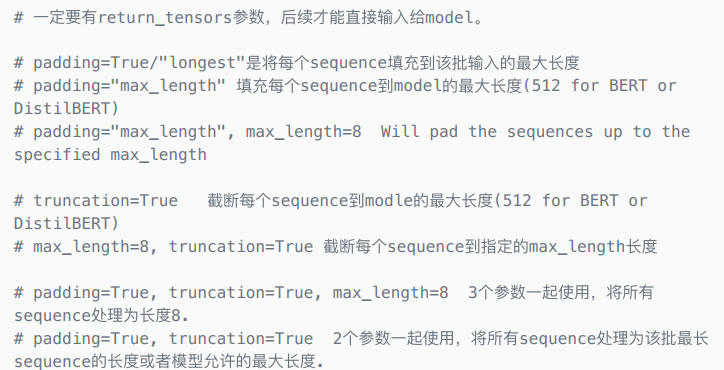